### See the GDP (Gross Domestic Product) Changes by Year

In [58]:
# Import libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [60]:
#check where the files are
#print("Current folder:", os.getcwd())

#for file in os.listdir():
#    print("File:", file)

### Import the GDP by month data 

In [63]:
# Read the GDP rate file and create the data frame

#df_monthly_gdp = pd.read_csv('cleaned_economic_data/gdp_df.csv')

#df_monthly_gdp.head() 


url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/cleaned_economic_data/gdp_df.csv'
df_monthly_gdp = pd.read_csv(url)  # Works similarly for CSV

df_monthly_gdp

,Date,GDP
0,1955-03-01,0.0
1,1955-04-01,0.0
2,1955-05-01,0.0
3,1955-06-01,2.0
4,1955-07-01,2.0
...,...,...
832,2024-07-01,0.0
833,2024-08-01,0.0
834,2024-09-01,0.1
835,2024-10-01,0.1


In [65]:
# Make sure the "Date" columns are datetime
df_monthly_gdp['Date'] = pd.to_datetime(df_monthly_gdp['Date'])


In [67]:
# Normalize or categorize GDP
# Create GDP growth category
df_monthly_gdp['GDP_category'] = pd.cut(
    df_monthly_gdp['GDP'],
    bins=[-float('inf'), 0.0, 0.5, float('inf')],
    labels=['recession', 'flat', 'growth']
)

df_monthly_gdp

,Date,GDP,GDP_category
0,1955-03-01,0.0,recession
1,1955-04-01,0.0,recession
2,1955-05-01,0.0,recession
3,1955-06-01,2.0,growth
4,1955-07-01,2.0,growth
...,...,...,...
832,2024-07-01,0.0,recession
833,2024-08-01,0.0,recession
834,2024-09-01,0.1,flat
835,2024-10-01,0.1,flat


In [69]:
# Get min and max dates
min_date = df_monthly_gdp['Date'].min()
max_date = df_monthly_gdp['Date'].max()

print("Minimum date:", min_date)
print("Maximum date:", max_date)

Minimum date: 1955-03-01 00:00:00
Maximum date: 2024-11-01 00:00:00


In [71]:
# Add 'Month' and 'Year' columns
df_monthly_gdp['Month'] = df_monthly_gdp['Date'].dt.strftime('%B')  # e.g., "January"
df_monthly_gdp['Year'] = df_monthly_gdp['Date'].dt.year

In [73]:
df_monthly_gdp

,Date,GDP,GDP_category,Month,Year
0,1955-03-01,0.0,recession,March,1955
1,1955-04-01,0.0,recession,April,1955
2,1955-05-01,0.0,recession,May,1955
3,1955-06-01,2.0,growth,June,1955
4,1955-07-01,2.0,growth,July,1955
...,...,...,...,...,...
832,2024-07-01,0.0,recession,July,2024
833,2024-08-01,0.0,recession,August,2024
834,2024-09-01,0.1,flat,September,2024
835,2024-10-01,0.1,flat,October,2024


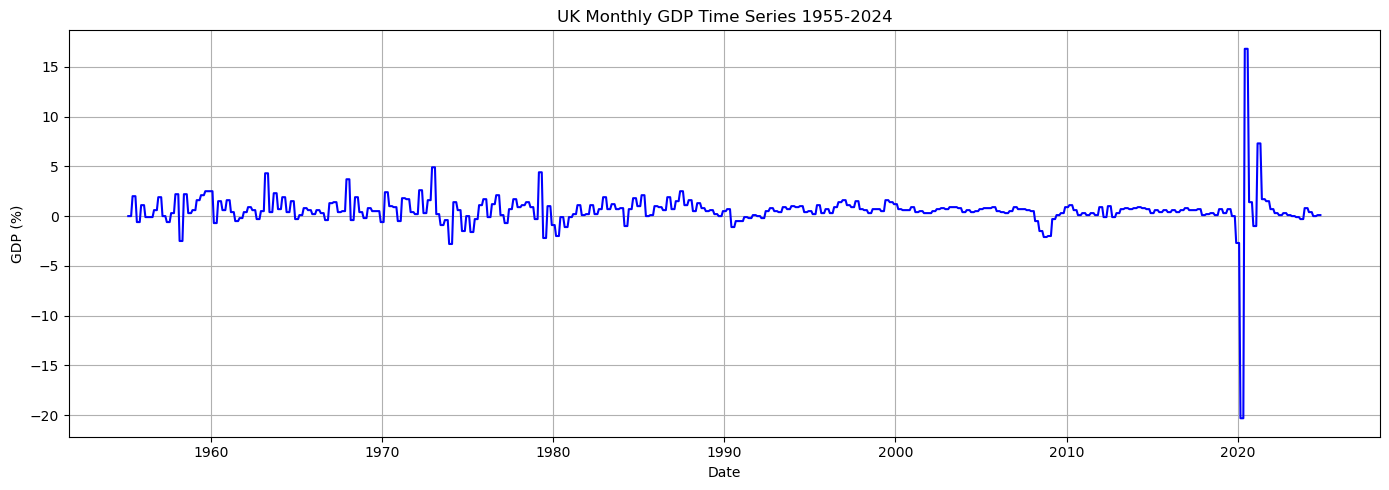

In [75]:
# Plot it for visualisation
plt.figure(figsize=(14, 5))
plt.plot(df_monthly_gdp['Date'], df_monthly_gdp['GDP'], color='blue', linewidth=1.5)
plt.title('UK Monthly GDP Time Series 1955-2024')
plt.xlabel('Date')
plt.ylabel('GDP (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Import speaches data

In [78]:
# Read the speeches file and create the data frame

cleaned_speeches_uk = pd.read_excel('CleanedDataUK.xlsx')

cleaned_speeches_uk.head() 

,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text
0,r980915a_BOE,United Kingdom,1998-09-15,1998,September,Speech,George,Yes,"Thank you, Chairman. I'm actually very pleased..."
1,r981021b_BOE,United Kingdom,1998-10-21,1998,October,Britain in Europe,George,Yes,It's a great pleasure to be here in the beauti...
2,r981021a_BOE,United Kingdom,1998-10-21,1998,October,Impact of the recent turbulence in internation...,King,No,Few industries have suffered more from volatil...
3,r981101a_BOE,United Kingdom,1998-11-01,1998,November,"Economic policy, with and without forecasts",Budd,No,My topic this evening is the use of forecasts ...
4,r981101b_BOE,United Kingdom,1998-11-01,1998,November,Inflation targeting in practice: the UK experi...,Vickers,No,"Six years ago this week, sterling left the exc..."


In [80]:
# create a dataframe with just the dates

date_speech_uk = cleaned_speeches_uk[['Date']]
date_speech_uk.columns = ['speech_date']

date_speech_uk.head() 

,speech_date
0,1998-09-15
1,1998-10-21
2,1998-10-21
3,1998-11-01
4,1998-11-01


In [82]:
# Create a copy
date_speech_uk = date_speech_uk.copy()

# Extract year and month
date_speech_uk['year_month'] = date_speech_uk['speech_date'].dt.to_period('M')

# Group by year and month, and count the number of speeches
monthly_speech_counts = date_speech_uk.groupby('year_month').size().reset_index(name='speech_count')

# Display the new DataFrame
monthly_speech_counts.head()

,year_month,speech_count
0,1998-09,1
1,1998-10,2
2,1998-11,3
3,1998-12,2
4,1999-01,2


In [84]:
#Check for data types
monthly_speech_counts.dtypes

year_month      period[M]
speech_count        int64
dtype: object

In [86]:
# Convert to datetime
monthly_speech_counts['year_month'] = monthly_speech_counts['year_month'].dt.to_timestamp()


In [88]:
#Check for data types
monthly_speech_counts.dtypes

year_month      datetime64[ns]
speech_count             int64
dtype: object

<Figure size 1400x400 with 0 Axes>

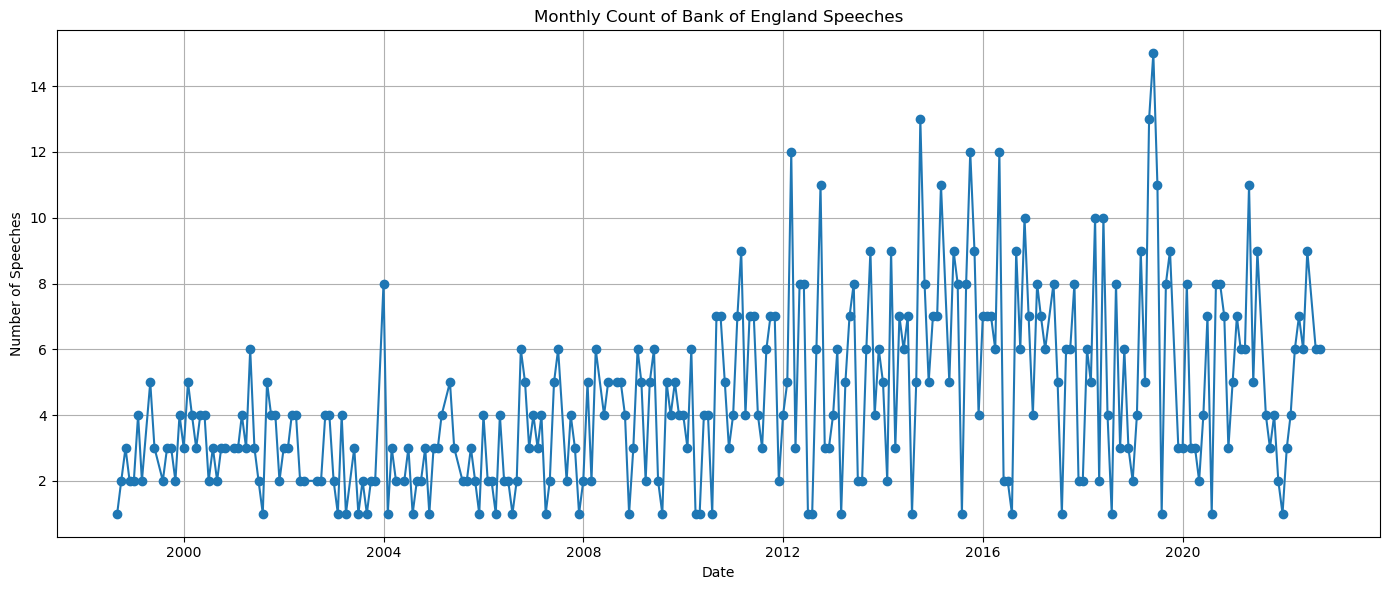

In [90]:
#plot the speech dates on a timeline

# Start the plot
plt.figure(figsize=(14, 4))

# Plot
plt.figure(figsize=(14, 6))
plt.plot(monthly_speech_counts['year_month'], monthly_speech_counts['speech_count'], marker='o', linestyle='-')
plt.title('Monthly Count of Bank of England Speeches')
plt.xlabel('Date')
plt.ylabel('Number of Speeches')
plt.grid(True)
plt.tight_layout()
plt.show()

In [92]:
# Filter Monthly GDP by 1997-2022

# Convert 'Date' column to datetime type
df_monthly_gdp['Date'] = pd.to_datetime(df_monthly_gdp['Date'])

# Monthly GDP
df_monthly_gdp_filtered = df_monthly_gdp[
    (df_monthly_gdp['Date'] >= '1997-01-01') &
    (df_monthly_gdp['Date'] <= '2022-12-31')
]

# Reset index
df_monthly_gdp_filtered = df_monthly_gdp_filtered.reset_index(drop=True)


print("\n==== Monthly GDP (Filtered: 1997–2022) ====")
print(df_monthly_gdp_filtered)



==== Monthly GDP (Filtered: 1997–2022) ====
          Date  GDP GDP_category      Month  Year
0   1997-01-01  1.6       growth    January  1997
1   1997-02-01  1.6       growth   February  1997
2   1997-03-01  1.1       growth      March  1997
3   1997-04-01  1.1       growth      April  1997
4   1997-05-01  1.1       growth        May  1997
..         ...  ...          ...        ...   ...
307 2022-08-01  0.1         flat     August  2022
308 2022-09-01  0.3         flat  September  2022
309 2022-10-01  0.3         flat    October  2022
310 2022-11-01  0.3         flat   November  2022
311 2022-12-01  0.1         flat   December  2022

[312 rows x 5 columns]


In [94]:
#Min and Max date check

# Monthly GDP
min_date = df_monthly_gdp_filtered['Date'].min()
max_date = df_monthly_gdp_filtered['Date'].max()

print("Minimum Monthly GDP date:", min_date)
print("Maximum Monthly GDP date:", max_date)


# Monthly speech date 
min_date = monthly_speech_counts['year_month'].min()
max_date = monthly_speech_counts['year_month'].max()

print("Minimum Monthly speech date:", min_date)
print("Maximum Monthly speech date:", max_date)

Minimum Monthly GDP date: 1997-01-01 00:00:00
Maximum Monthly GDP date: 2022-12-01 00:00:00
Minimum Monthly speech date: 1998-09-01 00:00:00
Maximum Monthly speech date: 2022-10-01 00:00:00


In [96]:
# Convert Period to datetime (timestamp at start of month)
monthly_speech_counts['year_month'] = monthly_speech_counts['year_month'].astype(str)
monthly_speech_counts['year_month'] = pd.to_datetime(monthly_speech_counts['year_month'])


### Import sentiment analysis data

In [139]:
# Read the speeches sentiment file and create the data frame

speeches_sentiment_uk = pd.read_csv('finbert_sentiment.csv')

speeches_sentiment_uk.head() 

,polarity_score_finbert,Date
0,-0.062779,1998-09-15
1,0.464896,1998-10-21
2,-0.146942,1998-10-21
3,0.014382,1998-11-01
4,0.014361,1998-11-01


In [141]:
#Check if the data types are right 
speeches_sentiment_uk.dtypes

polarity_score_finbert    float64
Date                       object
dtype: object

In [143]:
# Convert date to datetime
speeches_sentiment_uk['Date'] = pd.to_datetime(speeches_sentiment_uk['Date'], errors='coerce', dayfirst=True)
#Check if the data types are right 
speeches_sentiment_uk.dtypes

/var/folders/77/z42459tx3fs25jmqw010j1f40000gn/T/ipykernel_4533/3584403921.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  speeches_sentiment_uk['Date'] = pd.to_datetime(speeches_sentiment_uk['Date'], errors='coerce', dayfirst=True)


polarity_score_finbert           float64
Date                      datetime64[ns]
dtype: object

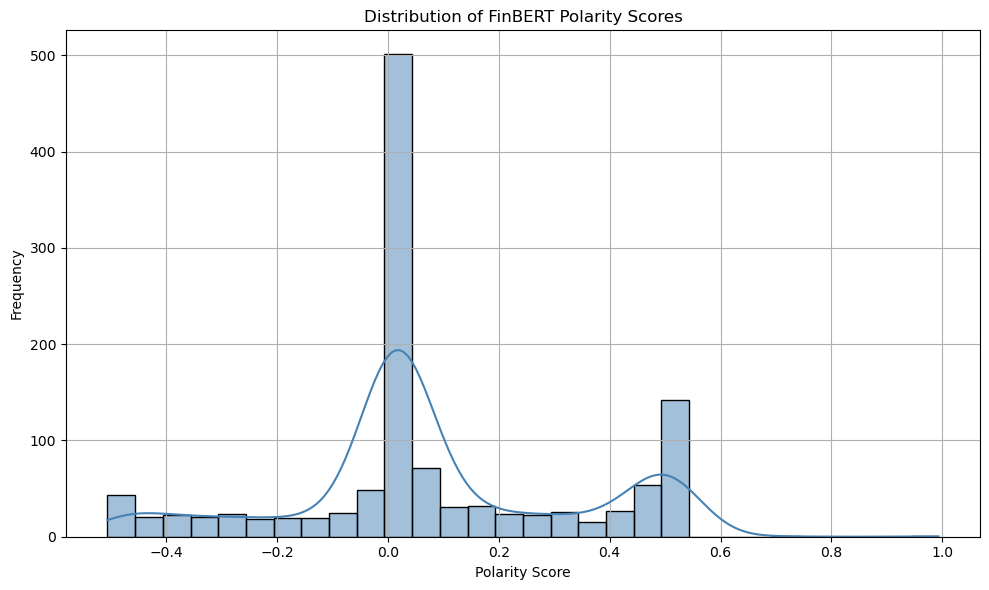

In [145]:
# check the shape of the sentiment score
# Remove missing values (if any)
scores = speeches_sentiment_uk['polarity_score_finbert'].dropna()

# Plot histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(scores, bins=30, kde=True, color='steelblue')

plt.title('Distribution of FinBERT Polarity Scores')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


In [392]:
# Pull out the extreme sentiment speeches to see what they are like

# Top 15 speeches
top_positive = speeches_sentiment_uk.sort_values(by='polarity_score_finbert', ascending=False).head(15)
top_positive

,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text,SentimentScore_nltk,...,Year_Chunk,polarity_textblob,subjectivity_textblob,neutral_finbert,positive_finbert,negative_finbert,polarity_score_finbert,Sentiment_vader,lexicon_score,roberta_sentiment
575,r120506a_BOE,United Kingdom,2012-05-06,2012.0,May,On counterparty risk,No_Info,No,counterparty risk unmonitorable example bank 1...,-24.8,...,2010–2014,0.051822326609560654,0.327442,0.006749,0.993114,0.000137,0.992977,-0.9924,-24.8,Neutral
144,r020204a_BOE,United Kingdom,2002-02-04,2002.0,February,Bankers Club/Guild Banquet,George,Yes,explain pet theory relativity based fact year ...,-10.5,...,2000–2004,0.064384812,0.415261,0.068628,0.815333,0.116038,0.699295,0.9927,-10.5,Neutral
51,r000928a_BOE,United Kingdom,2000-09-28,2000.0,September,Iran Invest 2000 Conference,George,Yes,delighted able take part conference particular...,67.9,...,2000–2004,0.13779817883266152,0.397089,0.483677,0.515343,0.000980,0.514364,0.9996,67.9,Positive
982,r181127a_BOE,United Kingdom,2018-11-27,2018.0,November,Transforming our payments infrastructure,Cleland,No,transforming payments infrastructure payments ...,55.5,...,2015–2019,0.14270816209107345,0.429631,0.483677,0.515343,0.000980,0.514363,0.9997,55.5,Positive
1196,r210617a_BOE,United Kingdom,2021-06-17,2021.0,June,Central Bank Digital Currency: An update on th...,Mutton,No,tend reach payment methods accustomed using fo...,22.7,...,2020–2024,0.098600084,0.408954,0.483677,0.515343,0.000980,0.514363,0.9995,22.7,Positive
1200,r210601a_BOE,United Kingdom,2021-06-01,2021.0,June,Tackling climate for real: the role of central...,Bailey,No,tend reach payment methods accustomed using fo...,22.7,...,2020–2024,0.098600084,0.408954,0.483677,0.515343,0.000980,0.514363,0.9995,22.7,Positive
408,r101013a_BOE,United Kingdom,2010-10-13,2010.0,October,Sustaining the Recovery,Sentance,No,delighted giving speech evening heart westmins...,-53.6,...,2010–2014,0.092158441,0.366759,0.483677,0.515343,0.000980,0.514363,0.9994,-53.6,Positive
1055,r191008a_BOE,United Kingdom,2019-10-08,2019.0,October,Enhancing resilience in payments,Cleland,No,pleasure speaking payexpo business design cent...,-14.1,...,2015–2019,0.10048029401154397,0.434466,0.483677,0.515343,0.000980,0.514363,0.9995,-14.1,Positive
970,r180927a_BOE,United Kingdom,2018-09-27,2018.0,September,Real-Time Gross Settlement (RTGS) Renewal: Ena...,Cleland,No,good morning pleasure join today technology in...,85.2,...,2015–2019,0.12832739840804355,0.408332,0.483679,0.515341,0.000980,0.514361,0.9998,85.2,Positive
447,r100318a_BOE,United Kingdom,2010-03-18,2010.0,March,Prospects for Global Economic Recovery,Sentance,No,threeandahalf years spent far monetary policy ...,4.0,...,2010–2014,0.099249706,0.364878,0.483677,0.515341,0.000982,0.514360,0.9989,4.0,Neutral


In [394]:
# 15 most negitive speeches

top_negative = speeches_sentiment_uk.sort_values(by='polarity_score_finbert', ascending=True).head(15)
top_negative 

,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text,SentimentScore_nltk,...,Year_Chunk,polarity_textblob,subjectivity_textblob,neutral_finbert,positive_finbert,negative_finbert,polarity_score_finbert,Sentiment_vader,lexicon_score,roberta_sentiment
987,r180928b_BOE,United Kingdom,2018-09-28,2018.0,September,Slides from Alex Brazier's speech at the confe...,No_Info,No,shadow banks not contain problems spread deriv...,-34.5,...,2015–2019,-0.043709416,0.281981,0.441965,0.026238,0.531797,-0.505558,0.3757,-34.5,Negative
80,r010724a_BOE,United Kingdom,2001-07-24,2001.0,July,The Current Policy Conundrum,Wadhwani,No,meet today time considerable uncertainty prosp...,-203.3,...,2000–2004,0.094948682,0.420718,0.483677,0.015351,0.500972,-0.485621,-0.9994,-203.3,Negative
633,r130423a_BOE,United Kingdom,2013-04-23,2013.0,April,The UK economy: the road ahead,Mccafferty,No,speeches available online thank inviting speak...,-126.4,...,2010–2014,0.045999483,0.384240,0.483696,0.015357,0.500947,-0.485590,-0.9970,-126.4,Negative
899,r170628a_BOE,United Kingdom,2017-06-28,2017.0,June,Policy Panel: Investment and growth in advance...,Carney,No,experience business investment uk since onset ...,-89.1,...,2015–2019,0.070432119,0.398343,0.483743,0.015359,0.500898,-0.485539,-0.9944,-89.1,Neutral
315,r081013a_BOE,United Kingdom,2008-10-13,2008.0,October,Prospects for the UK Economy and Challenges fo...,Sentance,No,last month seen period exceptional unprecedent...,-259.2,...,2005–2009,0.071684464,0.372421,0.483723,0.015372,0.500905,-0.485534,-0.9998,-259.2,Neutral
91,r011121a_BOE,United Kingdom,2001-11-21,2001.0,November,"The Stock Market, Capacity Uncertainties and t...",Wadhwani,No,business confidence declined significantly rec...,-210.2,...,2000–2004,0.066708957,0.435453,0.483697,0.015386,0.500917,-0.485530,-0.9994,-210.2,Negative
455,r111213a_BOE,United Kingdom,2011-12-13,2011.0,December,Prospects for monetary policy: learning the le...,Weale,No,obvious temptation making speech middecember u...,-193.7,...,2010–2014,0.068550843,0.451673,0.483806,0.015425,0.500769,-0.485344,-0.9991,-193.7,Negative
316,r081209a_BOE,United Kingdom,2008-12-09,2008.0,December,The Current Downturn,Sentence,No,pleased opportunity speak years monetary polic...,-85.2,...,2005–2009,0.071243906,0.392666,0.483854,0.015410,0.500736,-0.485326,-0.9981,-85.2,Positive
366,r091202a_BOE,United Kingdom,2009-12-02,2009.0,December,2009: A Review of the Economic Year,Dale,No,thank invitation speak morning occasion chairm...,-192.0,...,2005–2009,0.060889119,0.422519,0.483751,0.015470,0.500779,-0.485309,-0.9994,-192.0,Negative
1164,r200115a_BOE,United Kingdom,2020-01-15,2020.0,January,Risk management in a sluggish economy,Saunders,No,views expressed not necessarily bank england m...,-258.4,...,2020–2024,0.043720284,0.393155,0.483833,0.015450,0.500717,-0.485268,-0.9998,-258.4,Neutral


In [398]:
# export both as csv files so we can read them

# Save to CSV
top_positive.to_csv('top_15_positive_speeches.csv', index=False)
top_negative.to_csv('top_15_negative_speeches.csv', index=False)


In [149]:
# Create a 'year_month' column
speeches_sentiment_uk['year_month'] = speeches_sentiment_uk['Date'].dt.to_period('M')
speeches_sentiment_uk.head()

,polarity_score_finbert,Date,year_month
0,-0.062779,1998-09-15,1998-09
1,0.464896,1998-10-21,1998-10
2,-0.146942,1998-10-21,1998-10
3,0.014382,1998-11-01,1998-11
4,0.014361,1998-11-01,1998-11


In [151]:
# Group by 'year_month' and calculate the average sentiment
monthly_avg_sentiment = (
    speeches_sentiment_uk
    .groupby('year_month')['polarity_score_finbert']
    .mean()
    .reset_index()
)

monthly_avg_sentiment

,year_month,polarity_score_finbert
0,1998-09,-0.062779
1,1998-10,0.158977
2,1998-11,0.090372
3,1998-12,0.014141
4,1999-01,0.265154
...,...,...
267,2022-05,0.142797
268,2022-06,0.154499
269,2022-07,0.130976
270,2022-09,-0.129434


In [153]:
# Check data types
monthly_avg_sentiment.dtypes

year_month                period[M]
polarity_score_finbert      float64
dtype: object

In [155]:

# Convert Period to Timestamp for plotting
monthly_avg_sentiment['year_month'] = monthly_avg_sentiment['year_month'].dt.to_timestamp()

# Check data types
monthly_avg_sentiment.dtypes

year_month                datetime64[ns]
polarity_score_finbert           float64
dtype: object

In [177]:
#Min and Max date check

# Monthly GDP
min_date_GDP = df_monthly_gdp_filtered['Date'].min()
max_date_GDP = df_monthly_gdp_filtered['Date'].max()

print("Minimum Monthly GDP date:", min_date_GDP)
print("Maximum Monthly GDP date:", max_date_GDP)


# Monthly speech date 
min_date_count = monthly_speech_counts['year_month'].min()
max_date_count = monthly_speech_counts['year_month'].max()

print("Minimum Monthly speech date:", min_date_count)
print("Maximum Monthly speech date:", max_date_count)

# Monthly avg sentiment date
min_date_sen = monthly_avg_sentiment['year_month'].min()
max_date_sen = monthly_avg_sentiment['year_month'].max()

print("Minimum Monthly Avg Sentiment date:", min_date_sen)
print("Maximum Monthly Avg Sentiment:", max_date_sen)

Minimum Monthly GDP date: 1997-01-01 00:00:00
Maximum Monthly GDP date: 2022-12-01 00:00:00
Minimum Monthly speech date: 1998-09-01 00:00:00
Maximum Monthly speech date: 2022-10-01 00:00:00
Minimum Monthly Avg Sentiment date: 1998-09-01 00:00:00
Maximum Monthly Avg Sentiment: 2022-10-01 00:00:00


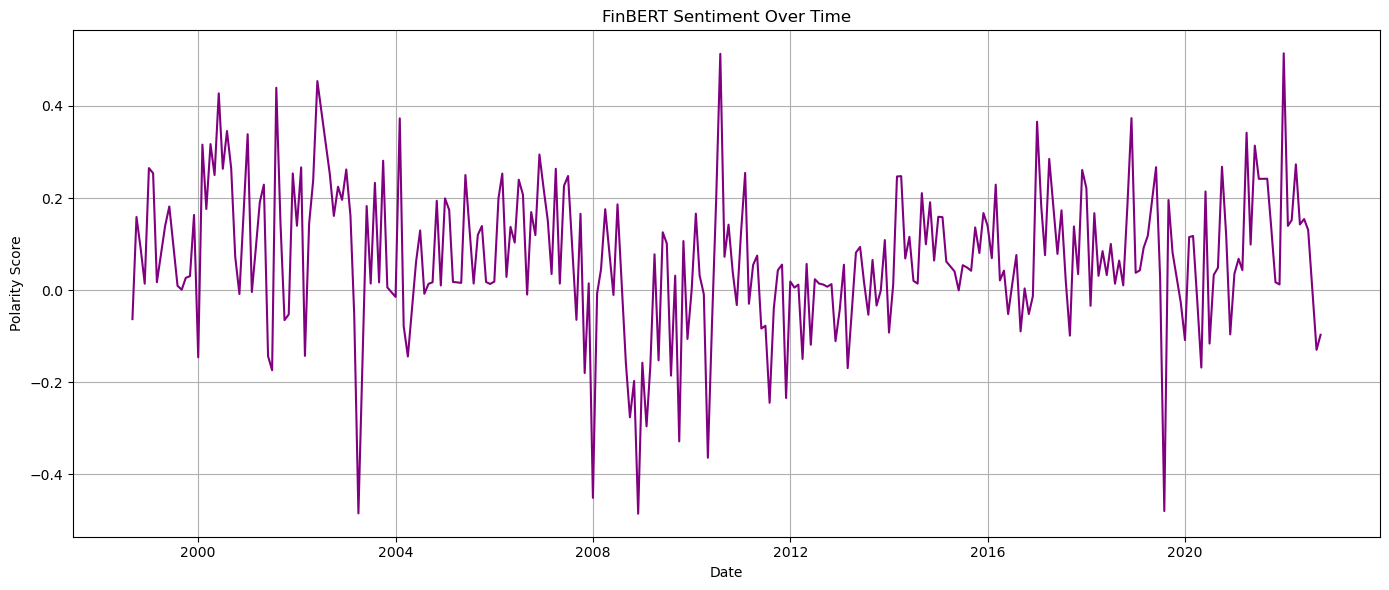

In [157]:

# Sort by date to ensure proper time sequence
sorted_monthly_avg_sentiment = monthly_avg_sentiment.sort_values('year_month')

# Plot
plt.figure(figsize=(14, 6))
plt.plot(sorted_monthly_avg_sentiment['year_month'], sorted_monthly_avg_sentiment['polarity_score_finbert'], color='purple')
plt.title('FinBERT Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Polarity Score')
plt.grid(True)
plt.tight_layout()
plt.show()


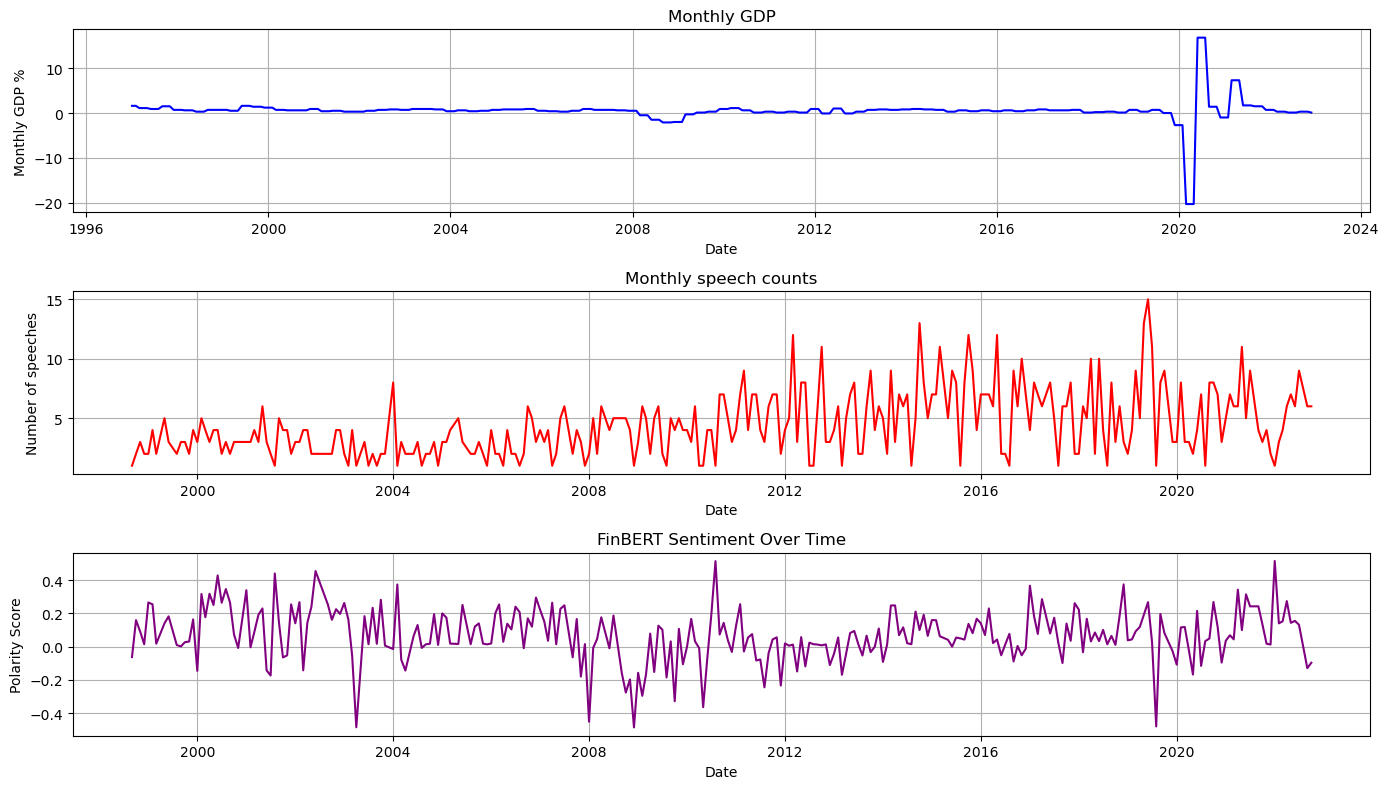

In [161]:
# Plot them all

# Create the figure and axes
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 8), sharex=False)

# First plot: Monthly GDP
ax1.plot(df_monthly_gdp_filtered['Date'], df_monthly_gdp_filtered['GDP'], color='blue')

ax1.set_title('Monthly GDP')
ax1.set_ylabel('Monthly GDP %')
ax1.set_xlabel('Date')
ax1.grid(True)

# Second plot: Speeches a month (count)
ax2.plot(monthly_speech_counts['year_month'], monthly_speech_counts['speech_count'], color='red')
ax2.set_title('Monthly speech counts')
ax2.set_ylabel('Number of speeches')
ax2.set_xlabel('Date')
ax2.grid(True)

# Third plot: Monthy sentiment (ACG, FinBERT)
ax3.plot(sorted_monthly_avg_sentiment['year_month'], sorted_monthly_avg_sentiment['polarity_score_finbert'], color='purple')
ax3.set_title('FinBERT Sentiment Over Time')
ax3.set_ylabel('Polarity Score')
ax3.set_xlabel('Date')
ax3.grid(True)

# Clean up layout
plt.tight_layout()
plt.show()

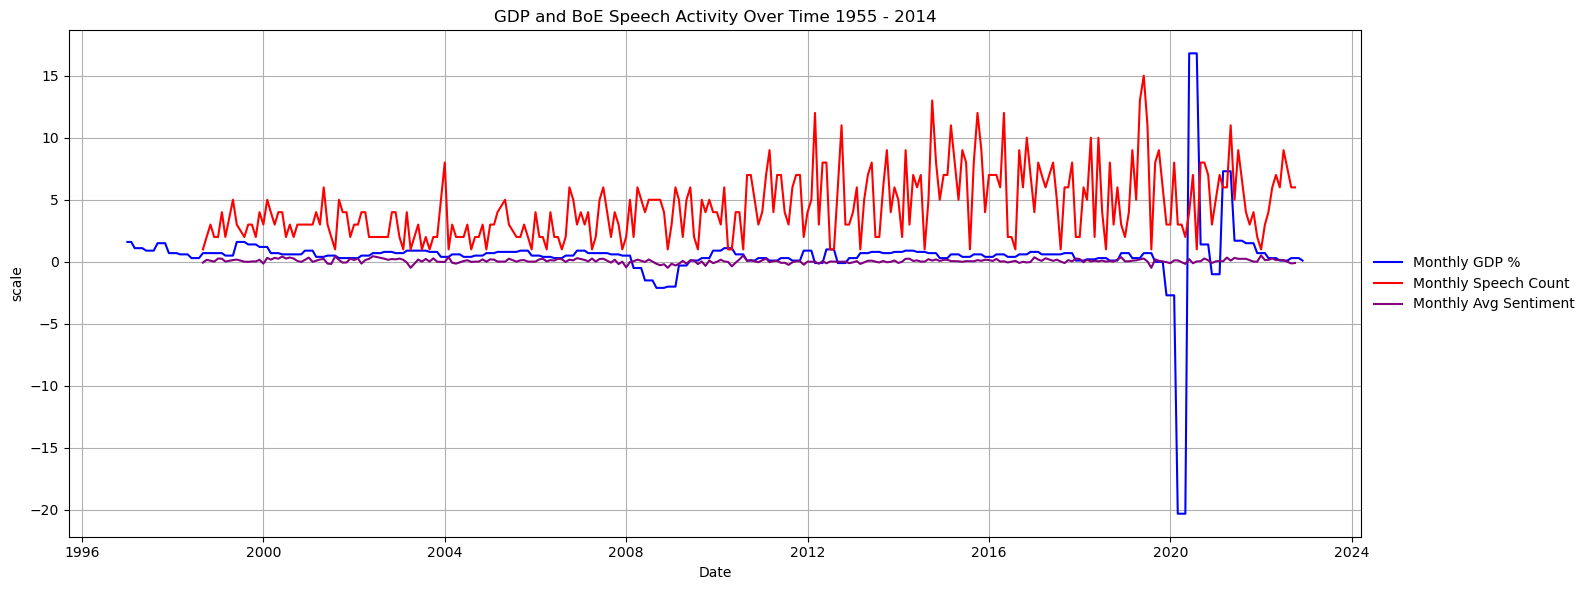

In [189]:
# Plot all three on the same axis

# Create the figure
plt.figure(figsize=(16, 6))

# Plot Monthly GDP
plt.plot(df_monthly_gdp_filtered['Date'], df_monthly_gdp_filtered['GDP'], label='Monthly GDP %', color='blue')

# Plot Speech Counts
plt.plot(monthly_speech_counts['year_month'], monthly_speech_counts['speech_count'], label='Monthly Speech Count', color='red')

# Plot monthly avg sentiment (FinBERT)
plt.plot(sorted_monthly_avg_sentiment['year_month'], sorted_monthly_avg_sentiment['polarity_score_finbert'], label='Monthly Avg Sentiment', color='purple')

# Add labels and legend
plt.title('GDP and BoE Speech Activity Over Time 1955 - 2014')
plt.xlabel('Date')
plt.ylabel('scale')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
plt.tight_layout()
plt.show()

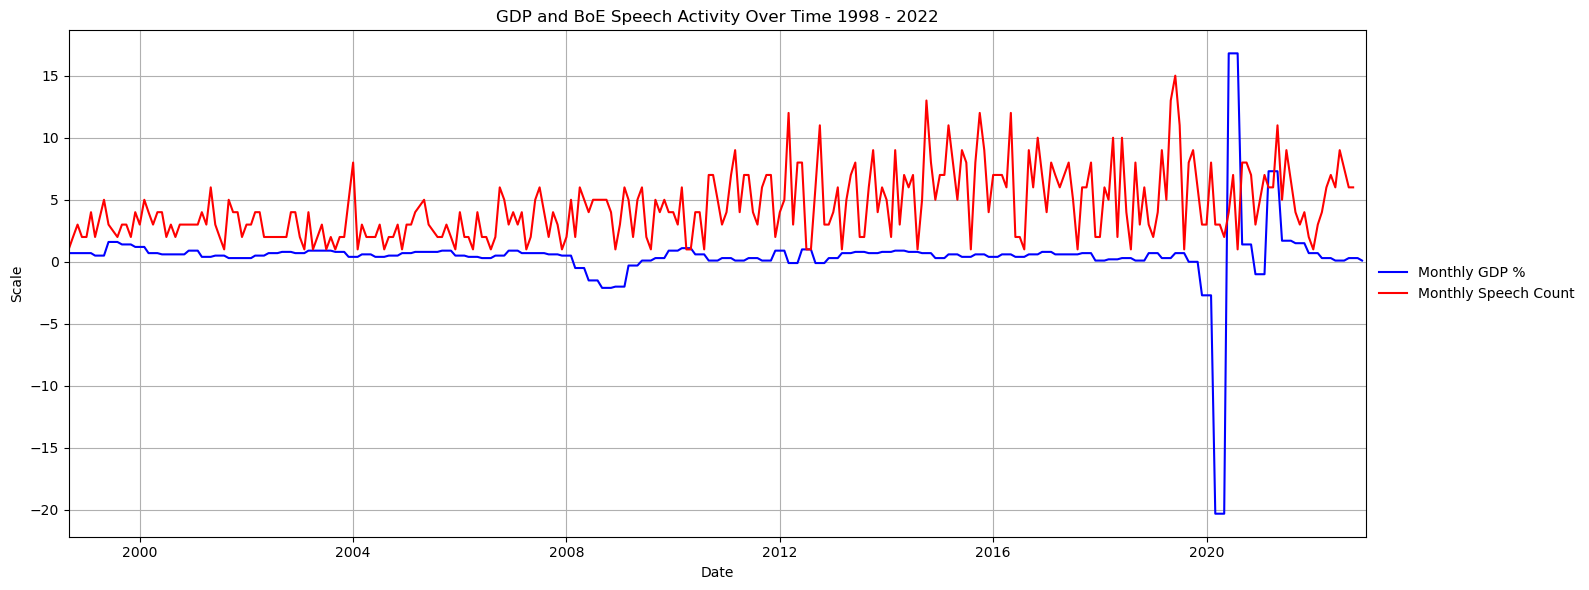

In [193]:
# Zoom in to the date range 1998 - 2022

# Check if library is there
from datetime import datetime

# Create the figure
plt.figure(figsize=(16, 6))

# Plot Monthly GDP
plt.plot(df_monthly_gdp_filtered['Date'], df_monthly_gdp_filtered['GDP'], label='Monthly GDP %', color='blue')


# Plot Speech Counts (scale if needed)
plt.plot(monthly_speech_counts['year_month'], monthly_speech_counts['speech_count'], label='Monthly Speech Count', color='red')

# Add labels and legend
plt.title('GDP and BoE Speech Activity Over Time 1998 - 2022')
plt.xlabel('Date')
plt.ylabel('Scale')
plt.grid(True)
plt.xlim(datetime(1998, 9, 1), datetime(2022, 12, 31)) # Zoom in to date range
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
plt.tight_layout()
plt.show()

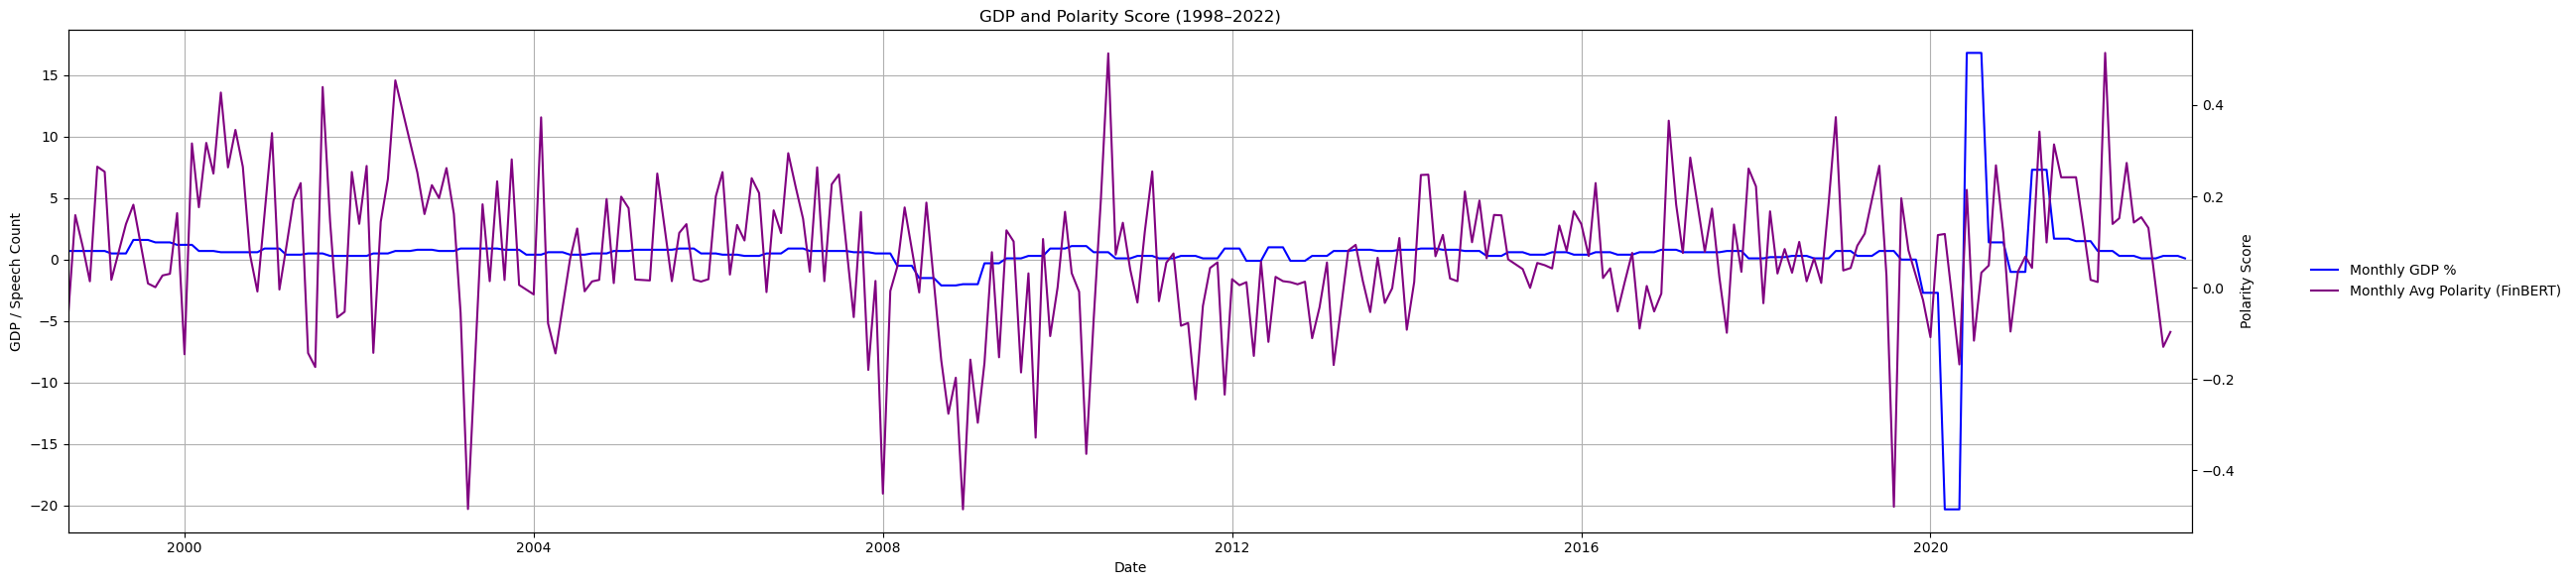

In [207]:
# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(26, 6))

# Plot GDP and speech count on ax1
ax1.plot(df_monthly_gdp_filtered['Date'], df_monthly_gdp_filtered['GDP'], label='Monthly GDP %', color='blue')
#ax1.plot(monthly_speech_counts['year_month'], monthly_speech_counts['speech_count'],
        # label='Monthly Speech Count', color='red')

ax1.set_xlabel('Date')
ax1.set_ylabel('GDP / Speech Count')
ax1.set_xlim(datetime(1998, 9, 1), datetime(2022, 12, 31))
ax1.grid(True)

# Create secondary axis for sentiment polarity
ax2 = ax1.twinx()
ax2.plot(monthly_avg_sentiment['year_month'], monthly_avg_sentiment['polarity_score_finbert'],
         label='Monthly Avg Polarity (FinBERT)', color='purple')
ax2.set_ylabel('Polarity Score')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='center left', bbox_to_anchor=(1.05, 0.5), frameon=False)

# Title and layout
#plt.title('GDP, Speech Count, and Polarity Score (1998–2022)')
plt.title('GDP and Polarity Score (1998–2022)')
plt.tight_layout()
plt.show()


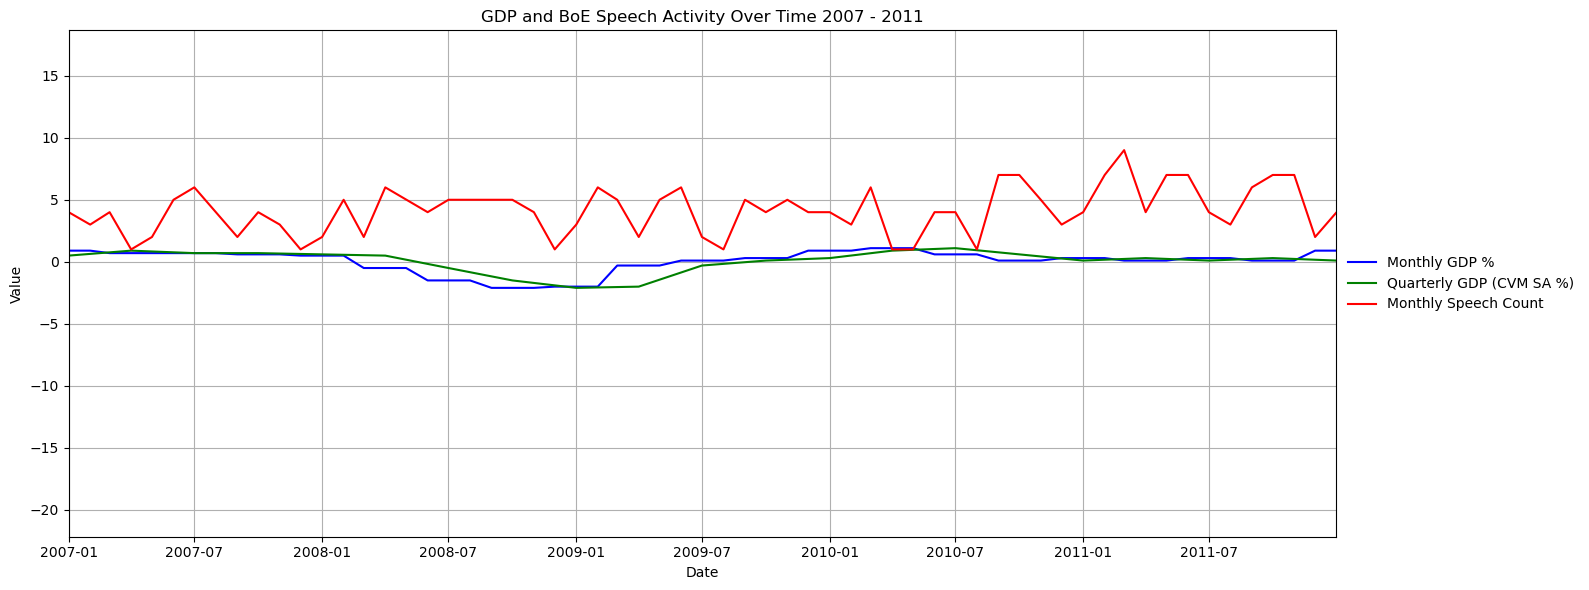

In [270]:
# Zoom in to the date range 2007 - 2011

# Check if library is there
from datetime import datetime

# Create the figure
plt.figure(figsize=(16, 6))

# Plot Monthly GDP
plt.plot(df_monthly_gdp_filtered['Date'], df_monthly_gdp_filtered['GDP'], label='Monthly GDP %', color='blue')

# Plot Quarterly GDP
plt.plot(df_quarterly_gdp_filtered['quarter_end_date'], df_quarterly_gdp_filtered['qoq _cvm _sa _percent'],
         label='Quarterly GDP (CVM SA %)', color='green')

# Plot Speech Counts (scale if needed)
plt.plot(monthly_speech_counts['year_month'], monthly_speech_counts['speech_count'], label='Monthly Speech Count', color='red')

# Add labels and legend
plt.title('GDP and BoE Speech Activity Over Time 2007 - 2011')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.xlim(datetime(2007, 1, 1), datetime(2011, 12, 31)) # Zoom in to date range
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
plt.tight_layout()
plt.show()

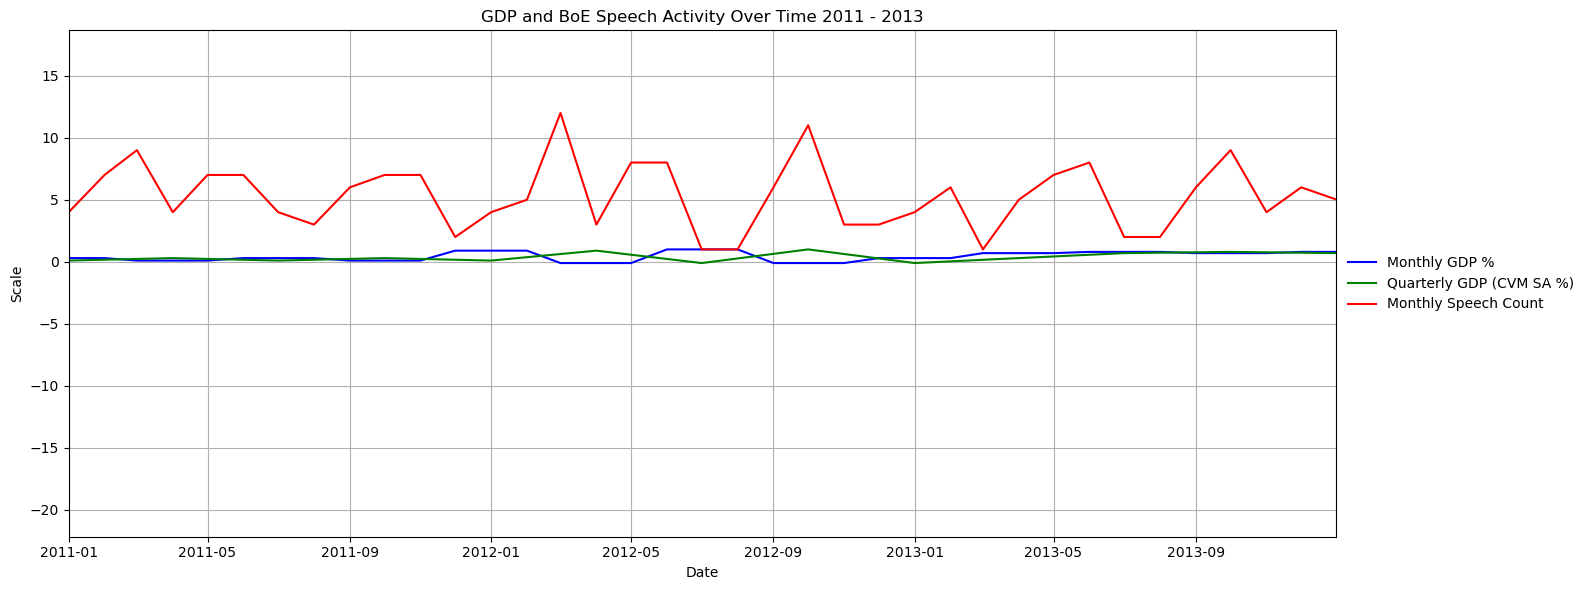

In [272]:
# Zoom in to the date range 2011 - 2013

# Check if library is there
from datetime import datetime

# Create the figure
plt.figure(figsize=(16, 6))

# Plot Monthly GDP
plt.plot(df_monthly_gdp_filtered['Date'], df_monthly_gdp_filtered['GDP'], label='Monthly GDP %', color='blue')

# Plot Quarterly GDP
plt.plot(df_quarterly_gdp_filtered['quarter_end_date'], df_quarterly_gdp_filtered['qoq _cvm _sa _percent'],
         label='Quarterly GDP (CVM SA %)', color='green')

# Plot Speech Counts (scale if needed)
plt.plot(monthly_speech_counts['year_month'], monthly_speech_counts['speech_count'], label='Monthly Speech Count', color='red')

# Add labels and legend
plt.title('GDP and BoE Speech Activity Over Time 2011 - 2013')
plt.xlabel('Date')
plt.ylabel('Scale')
plt.grid(True)
plt.xlim(datetime(2011, 1, 1), datetime(2013, 12, 31)) # Zoom in to date range
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
plt.tight_layout()
plt.show()

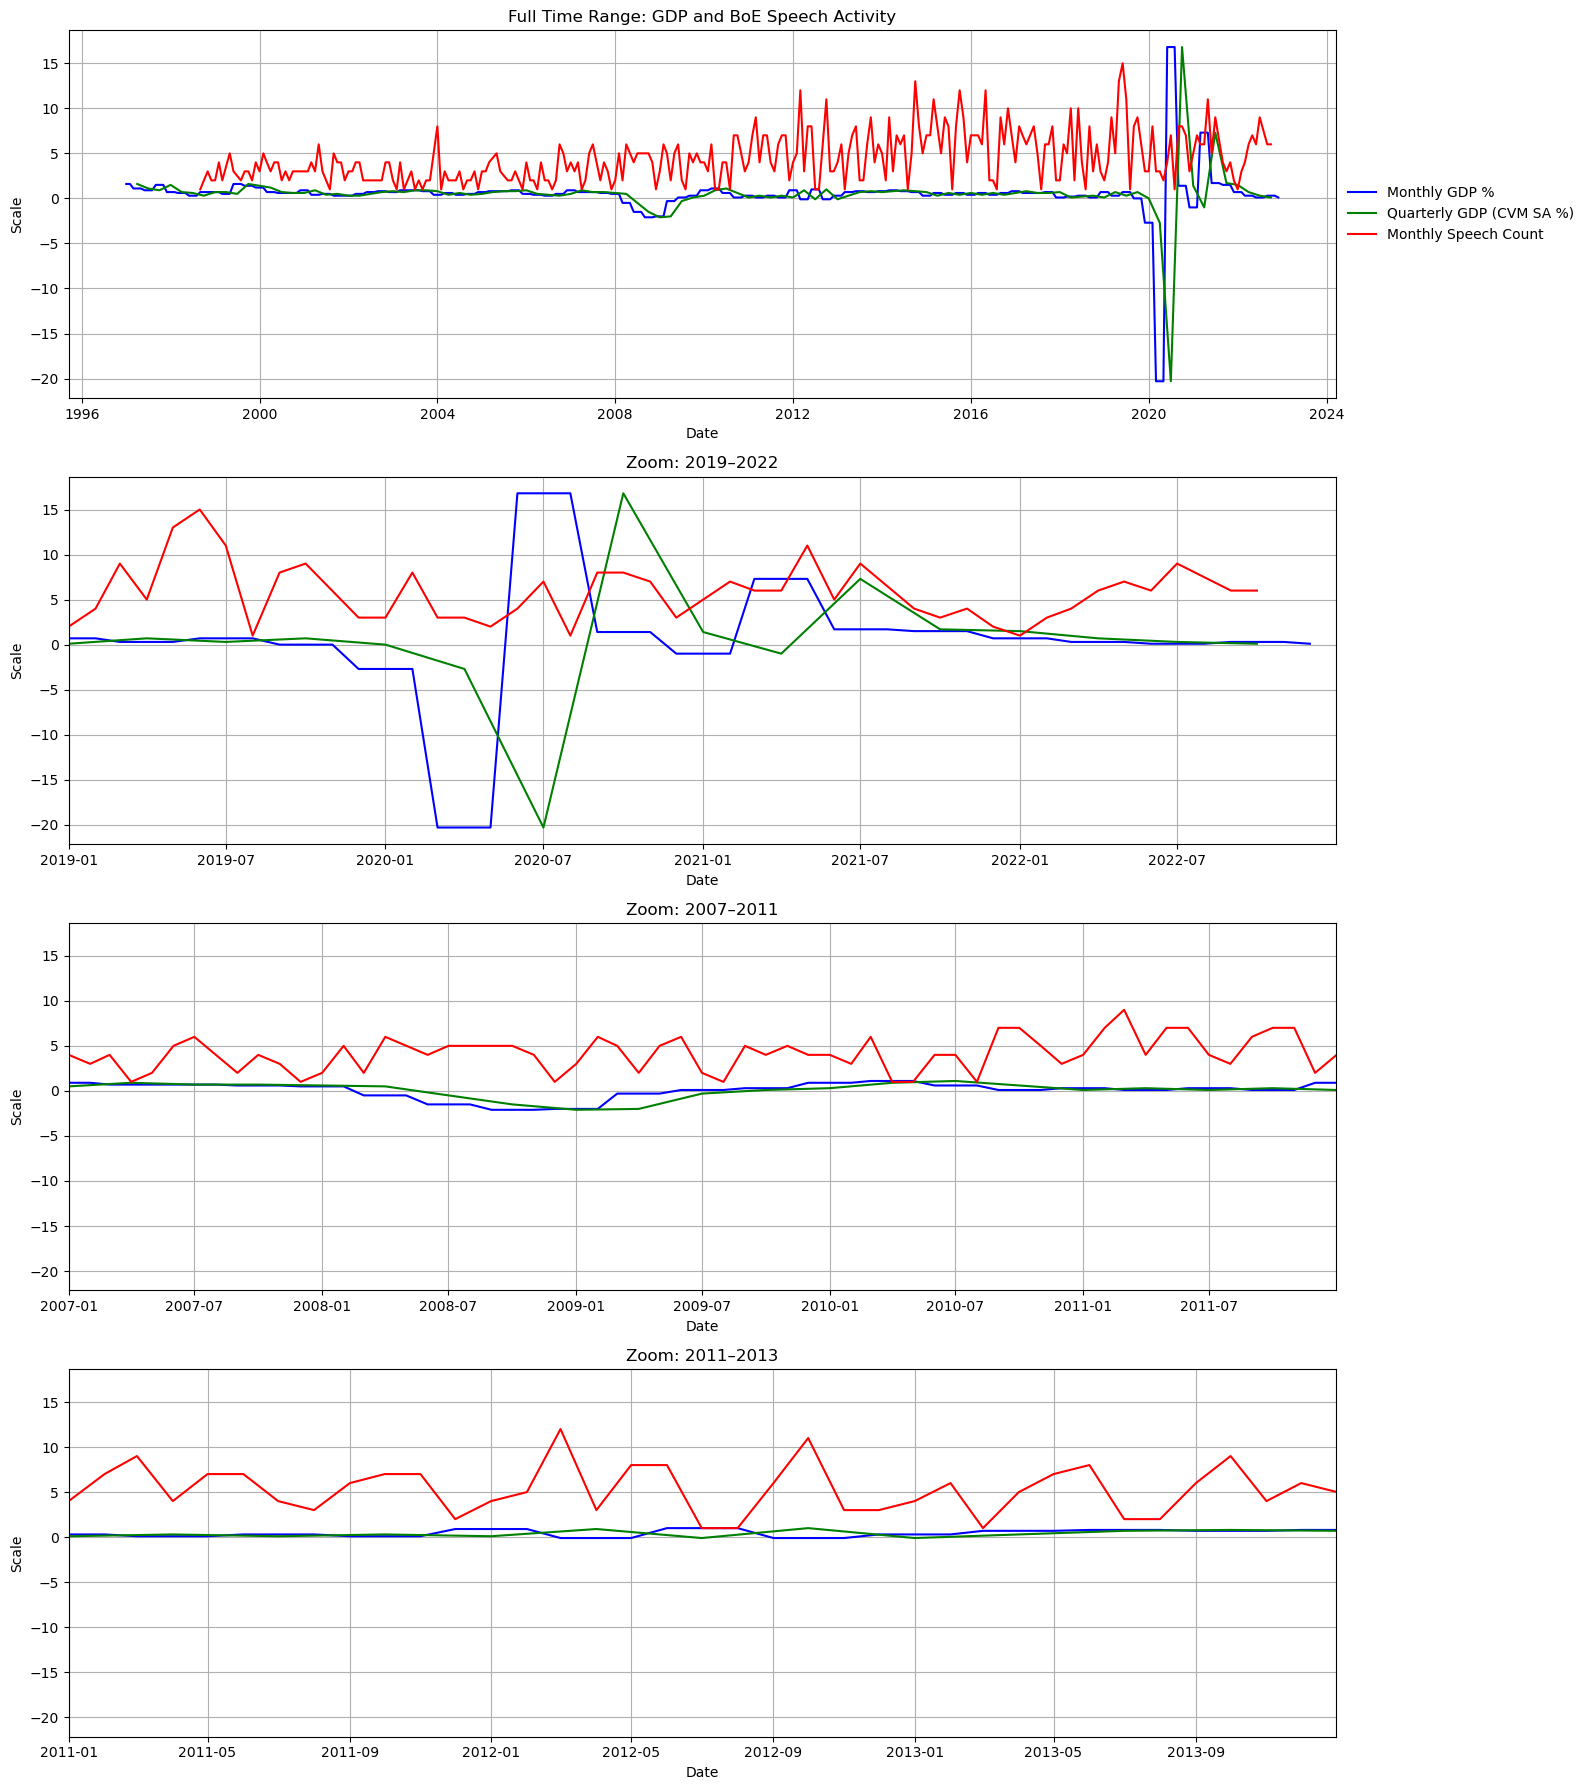

In [274]:
# Create a 4-row subplot
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 18), sharey=True)

# Define common plotting function
def plot_all(ax, xlim_range=None, title=''):
    ax.plot(df_monthly_gdp_filtered['Date'], df_monthly_gdp_filtered['GDP'], label='Monthly GDP %', color='blue')
    ax.plot(df_quarterly_gdp_filtered['quarter_end_date'], df_quarterly_gdp_filtered['qoq _cvm _sa _percent'], label='Quarterly GDP (CVM SA %)', color='green')
    ax.plot(monthly_speech_counts['year_month'], monthly_speech_counts['speech_count'], label='Monthly Speech Count', color='red')
    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Scale')
    ax.grid(True)
    if xlim_range:
        ax.set_xlim(xlim_range)

# Plot 1: Full range
plot_all(ax1, title='Full Time Range: GDP and BoE Speech Activity')

# Plot 2: 2019–2022
plot_all(ax2, (datetime(2019, 1, 1), datetime(2022, 12, 31)), title='Zoom: 2019–2022')

# Plot 3: 2007–2011
plot_all(ax3, (datetime(2007, 1, 1), datetime(2011, 12, 31)), title='Zoom: 2007–2011')

# Plot 4: 2011–2013
plot_all(ax4, (datetime(2011, 1, 1), datetime(2013, 12, 31)), title='Zoom: 2011–2013')

# Add legend only to first plot
ax1.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)

# Tidy layout
plt.tight_layout()
plt.show()


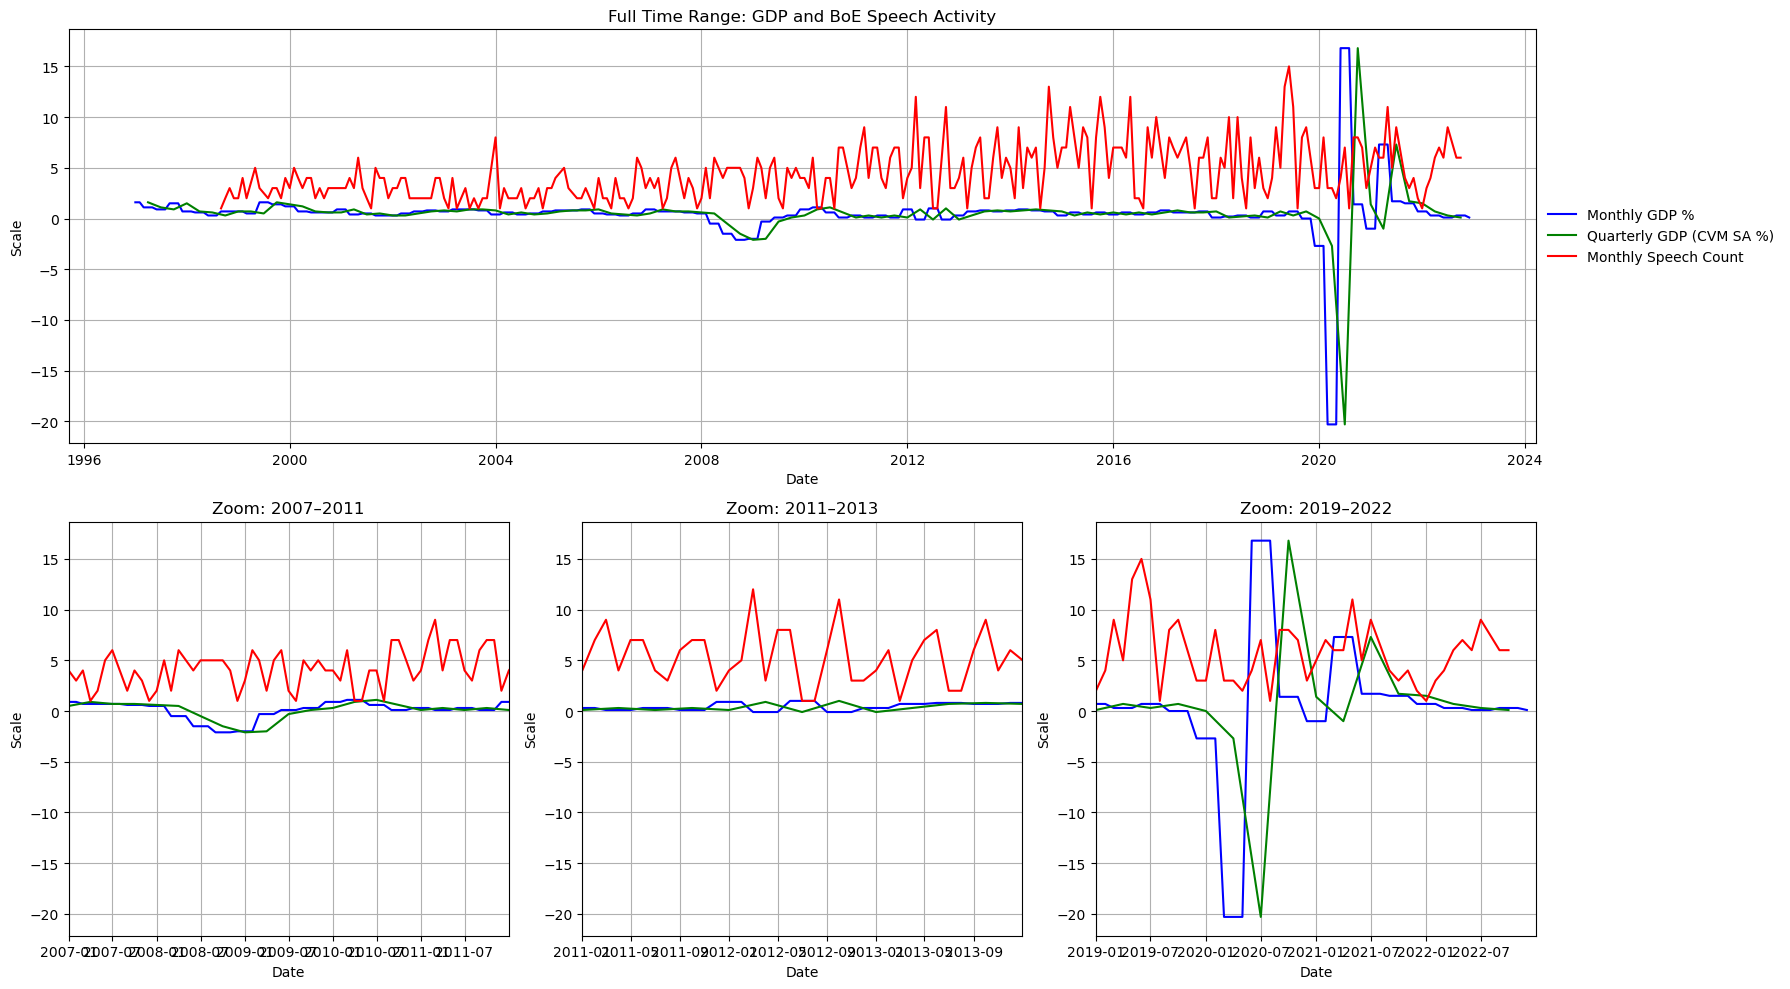

In [275]:
# Reorganise the plots to tell the story better

# check if library is there
from matplotlib.gridspec import GridSpec

# Set up the grid layout: 2 rows, 3 columns; first row spans all columns
fig = plt.figure(figsize=(18, 10))
gs = GridSpec(2, 3, figure=fig)

# Full-width plot (top row, all columns)
ax1 = fig.add_subplot(gs[0, :])
# 3 zoomed-in plots (bottom row, 3 columns)
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])

# Common plotting function
def plot_all(ax, xlim_range=None, title=''):
    ax.plot(df_monthly_gdp_filtered['Date'], df_monthly_gdp_filtered['GDP'], label='Monthly GDP %', color='blue')
    ax.plot(df_quarterly_gdp_filtered['quarter_end_date'], df_quarterly_gdp_filtered['qoq _cvm _sa _percent'], label='Quarterly GDP (CVM SA %)', color='green')
    ax.plot(monthly_speech_counts['year_month'], monthly_speech_counts['speech_count'], label='Monthly Speech Count', color='red')
    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Scale')
    ax.grid(True)
    if xlim_range:
        ax.set_xlim(xlim_range)

# Full range
plot_all(ax1, title='Full Time Range: GDP and BoE Speech Activity')
ax1.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)

# Zoom 2007–2011
plot_all(ax2, (datetime(2007, 1, 1), datetime(2011, 12, 31)), title='Zoom: 2007–2011')

# Zoom 2011–2013
plot_all(ax3, (datetime(2011, 1, 1), datetime(2013, 12, 31)), title='Zoom: 2011–2013')

# Zoom 2019–2022
plot_all(ax4, (datetime(2019, 1, 1), datetime(2022, 12, 31)), title='Zoom: 2019–2022')

plt.tight_layout()
plt.show()
